In [1]:
print("Phan Đức An - 6351071001")

Phan Đức An - 6351071001


## Import thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

## Nhập dữ liệu

In [3]:
# Đọc dữ liệu Red Wine Quality
data = pd.read_csv('datasets/winequality-red.csv')

print("Thông tin dữ liệu Red Wine Quality:")
print(f"Số lượng dữ liệu: {len(data)}")
print(f"Số lượng cột: {len(data.columns)}")
print("\nThông tin chi tiết:")
print(data.info())
print("\nMẫu dữ liệu:")
display(data.head(10))
print("\nThống kê mô tả:")
display(data.describe())

Thông tin dữ liệu Red Wine Quality:
Số lượng dữ liệu: 1599
Số lượng cột: 12

Thông tin chi tiết:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Mẫu dữ liệu:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5



Thống kê mô tả:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Kiểm tra giá trị thiếu:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Phân bố chất lượng rượu (quality):
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


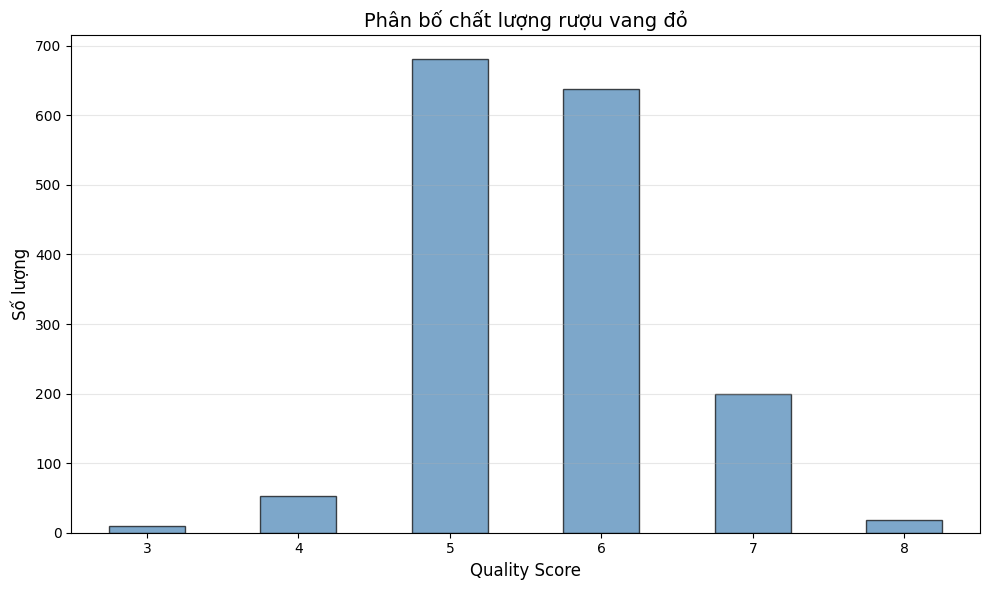

In [4]:
# Kiểm tra giá trị thiếu
print("Kiểm tra giá trị thiếu:")
print(data.isnull().sum())

# Phân bố của thuộc tính quyết định 'quality'
print("\nPhân bố chất lượng rượu (quality):")
print(data['quality'].value_counts().sort_index())

# Vẽ biểu đồ phân bố quality
plt.figure(figsize=(10, 6))
data['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue', alpha=0.7, edgecolor='black')
plt.title('Phân bố chất lượng rượu vang đỏ', fontsize=14)
plt.xlabel('Quality Score', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Chia dữ liệu thành tập huấn luyện (70%) và kiểm thử (30%)

In [5]:
# Chia dữ liệu thành train (70%) và test (30%)
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42, stratify=data['quality'])

print(f"Kích thước dữ liệu huấn luyện: {len(train_data)} ({len(train_data)/len(data)*100:.1f}%)")
print(f"Kích thước dữ liệu kiểm thử: {len(test_data)} ({len(test_data)/len(data)*100:.1f}%)")
print(f"\nPhân bố quality trong tập huấn luyện:")
print(train_data['quality'].value_counts().sort_index())
print(f"\nPhân bố quality trong tập kiểm thử:")
print(test_data['quality'].value_counts().sort_index())

Kích thước dữ liệu huấn luyện: 1119 (70.0%)
Kích thước dữ liệu kiểm thử: 480 (30.0%)

Phân bố quality trong tập huấn luyện:
quality
3      7
4     37
5    477
6    446
7    139
8     13
Name: count, dtype: int64

Phân bố quality trong tập kiểm thử:
quality
3      3
4     16
5    204
6    192
7     60
8      5
Name: count, dtype: int64


In [6]:
# Lưu lại kích thước để tách sau này
train_size = len(train_data)
test_size = len(test_data)

# Nối lại dữ liệu để xử lý đồng bộ
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)
print(f"Kích thước dữ liệu sau khi nối: {len(combined_data)}")

Kích thước dữ liệu sau khi nối: 1599


## Câu 3: Khảo sát độ tương đồng (Pearson Correlation)

In [7]:
# Tính ma trận tương quan Pearson
correlation_matrix = combined_data.corr()

print("Ma trận tương quan Pearson:")
display(correlation_matrix)

Ma trận tương quan Pearson:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


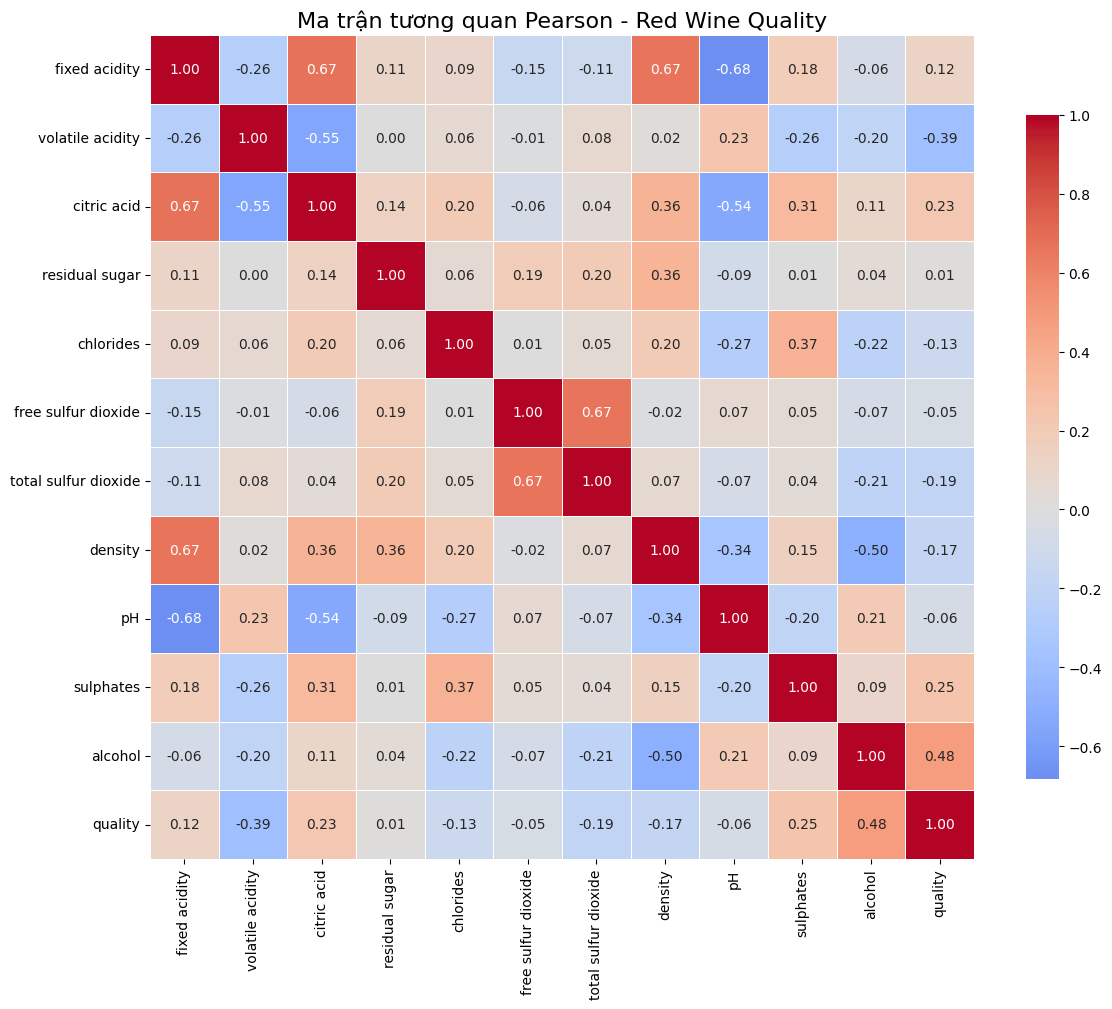

In [8]:
# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title('Ma trận tương quan Pearson - Red Wine Quality', fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
# Tìm các cặp thuộc tính có độ tương quan cao (>0.8)
print("Các cặp thuộc tính có độ tương quan cao (|correlation| > 0.8):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_val = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_val))
            print(f"  {col1} <-> {col2}: {corr_val:.4f}")

if len(high_corr_pairs) == 0:
    print("  Không có cặp thuộc tính nào có độ tương quan > 0.8")
    print("\nKết luận: Không cần loại bỏ cột nào.")
    cols_to_drop = []
else:
    # Loại bỏ các cột có độ tương quan cao
    cols_to_drop = [pair[1] for pair in high_corr_pairs]
    print(f"\nCác cột sẽ bị loại bỏ: {cols_to_drop}")
    combined_data = combined_data.drop(columns=cols_to_drop)
    print(f"Số cột còn lại sau khi loại bỏ: {len(combined_data.columns)}")

Các cặp thuộc tính có độ tương quan cao (|correlation| > 0.8):
  Không có cặp thuộc tính nào có độ tương quan > 0.8

Kết luận: Không cần loại bỏ cột nào.


## Câu 4: Tách features và labels

In [10]:
# Tách thuộc tính quyết định 'quality' ra khỏi dữ liệu
features = combined_data.drop('quality', axis=1)
labels = combined_data['quality']

print(f"Kích thước features: {features.shape}")
print(f"Kích thước labels: {labels.shape}")
print(f"\nCác cột trong features:\n{features.columns.tolist()}")
print(f"\nPhân bố labels:\n{labels.value_counts().sort_index()}")

Kích thước features: (1599, 11)
Kích thước labels: (1599,)

Các cột trong features:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Phân bố labels:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


## Câu 5: Chuyển đổi về dạng One-Hot Vector

In [11]:
# Xác định các cột không phải dạng số
categorical_cols = features.select_dtypes(include=['object']).columns
print(f"Các cột categorical cần chuyển đổi: {categorical_cols.tolist()}")

if len(categorical_cols) > 0:
    # Chuyển đổi các cột categorical về dạng one-hot vector
    features = pd.get_dummies(features, columns=categorical_cols)
    print(f"\nĐã chuyển đổi {len(categorical_cols)} cột categorical sang one-hot encoding")
else:
    print("\nKhông có cột categorical nào cần chuyển đổi. Tất cả các cột đều là số.")

print(f"\nKích thước features sau xử lý: {features.shape}")
print(f"Các cột trong features:\n{features.columns.tolist()}")

Các cột categorical cần chuyển đổi: []

Không có cột categorical nào cần chuyển đổi. Tất cả các cột đều là số.

Kích thước features sau xử lý: (1599, 11)
Các cột trong features:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Câu 6: Tách dữ liệu huấn luyện và kiểm thử

In [12]:
# Tách features về train và test như ban đầu
X_train = features[:train_size]
X_test = features[train_size:]

# Tách labels về train và test như ban đầu
y_train = labels[:train_size]
y_test = labels[train_size:]

print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")
print(f"Kích thước y_train: {y_train.shape}")
print(f"Kích thước y_test: {y_test.shape}")

print(f"\nPhân bố y_train:\n{y_train.value_counts().sort_index()}")
print(f"\nPhân bố y_test:\n{y_test.value_counts().sort_index()}")

Kích thước X_train: (1119, 11)
Kích thước X_test: (480, 11)
Kích thước y_train: (1119,)
Kích thước y_test: (480,)

Phân bố y_train:
quality
3      7
4     37
5    477
6    446
7    139
8     13
Name: count, dtype: int64

Phân bố y_test:
quality
3      3
4     16
5    204
6    192
7     60
8      5
Name: count, dtype: int64


## Câu 7: Xây dựng cây quyết định ID3 (criterion='entropy')

In [13]:
# Xây dựng mô hình cây ID3
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)

print("Mô hình cây ID3 đã được huấn luyện")
print(f"Độ sâu của cây: {id3_model.get_depth()}")
print(f"Số lượng lá: {id3_model.get_n_leaves()}")

Mô hình cây ID3 đã được huấn luyện
Độ sâu của cây: 17
Số lượng lá: 285


In [14]:
# Dự đoán trên tập kiểm thử
y_pred_id3 = id3_model.predict(X_test)

# Tính toán độ chính xác
accuracy_id3 = accuracy_score(y_test, y_pred_id3)
print(f"Độ chính xác của mô hình ID3: {accuracy_id3:.4f}")

# In classification report
print("\nClassification Report (ID3):")
print(classification_report(y_test, y_pred_id3))

Độ chính xác của mô hình ID3: 0.5750

Classification Report (ID3):
              precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.36      0.31      0.33        16
           5       0.68      0.65      0.66       204
           6       0.56      0.56      0.56       192
           7       0.43      0.48      0.45        60
           8       0.20      0.40      0.27         5

    accuracy                           0.57       480
   macro avg       0.45      0.46      0.45       480
weighted avg       0.58      0.57      0.58       480



Ma trận nhầm lẫn (ID3):
[[  1   0   1   1   0   0]
 [  1   5   6   3   1   0]
 [  0   4 132  61   7   0]
 [  0   4  49 107  28   4]
 [  0   1   7  19  29   4]
 [  0   0   0   0   3   2]]


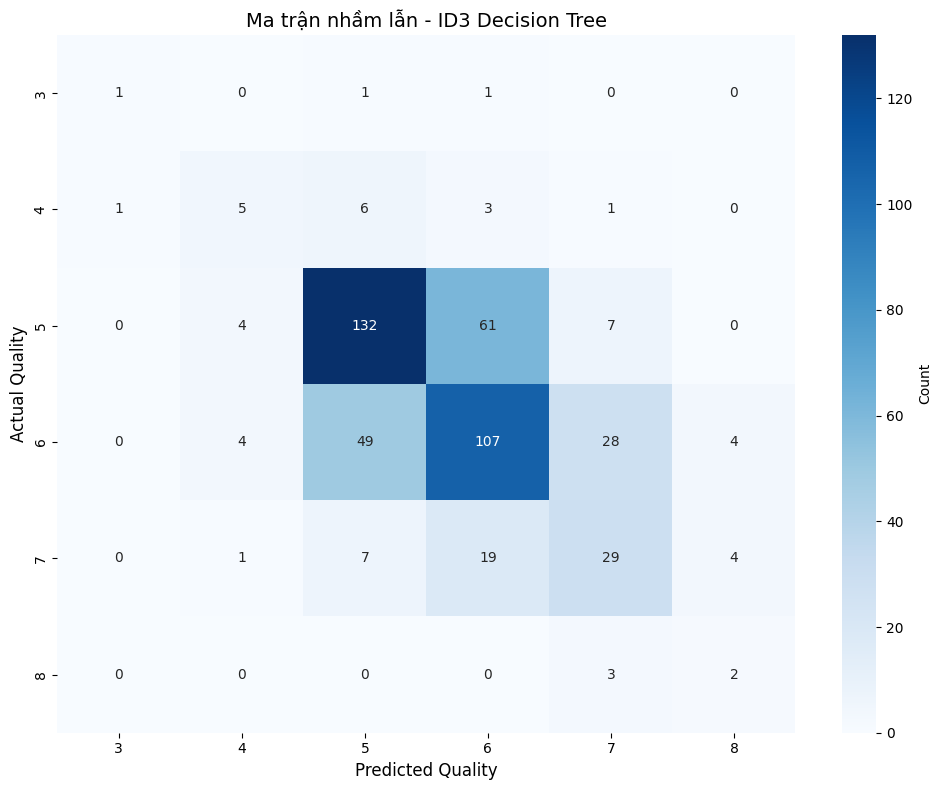

In [15]:
# Tính toán ma trận nhầm lẫn
cm_id3 = confusion_matrix(y_test, y_pred_id3)
print("Ma trận nhầm lẫn (ID3):")
print(cm_id3)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
quality_labels = sorted(y_test.unique())
sns.heatmap(cm_id3, annot=True, fmt='d', cmap='Blues', 
            xticklabels=quality_labels, 
            yticklabels=quality_labels,
            cbar_kws={'label': 'Count'})
plt.title('Ma trận nhầm lẫn - ID3 Decision Tree', fontsize=14)
plt.ylabel('Actual Quality', fontsize=12)
plt.xlabel('Predicted Quality', fontsize=12)
plt.tight_layout()
plt.show()

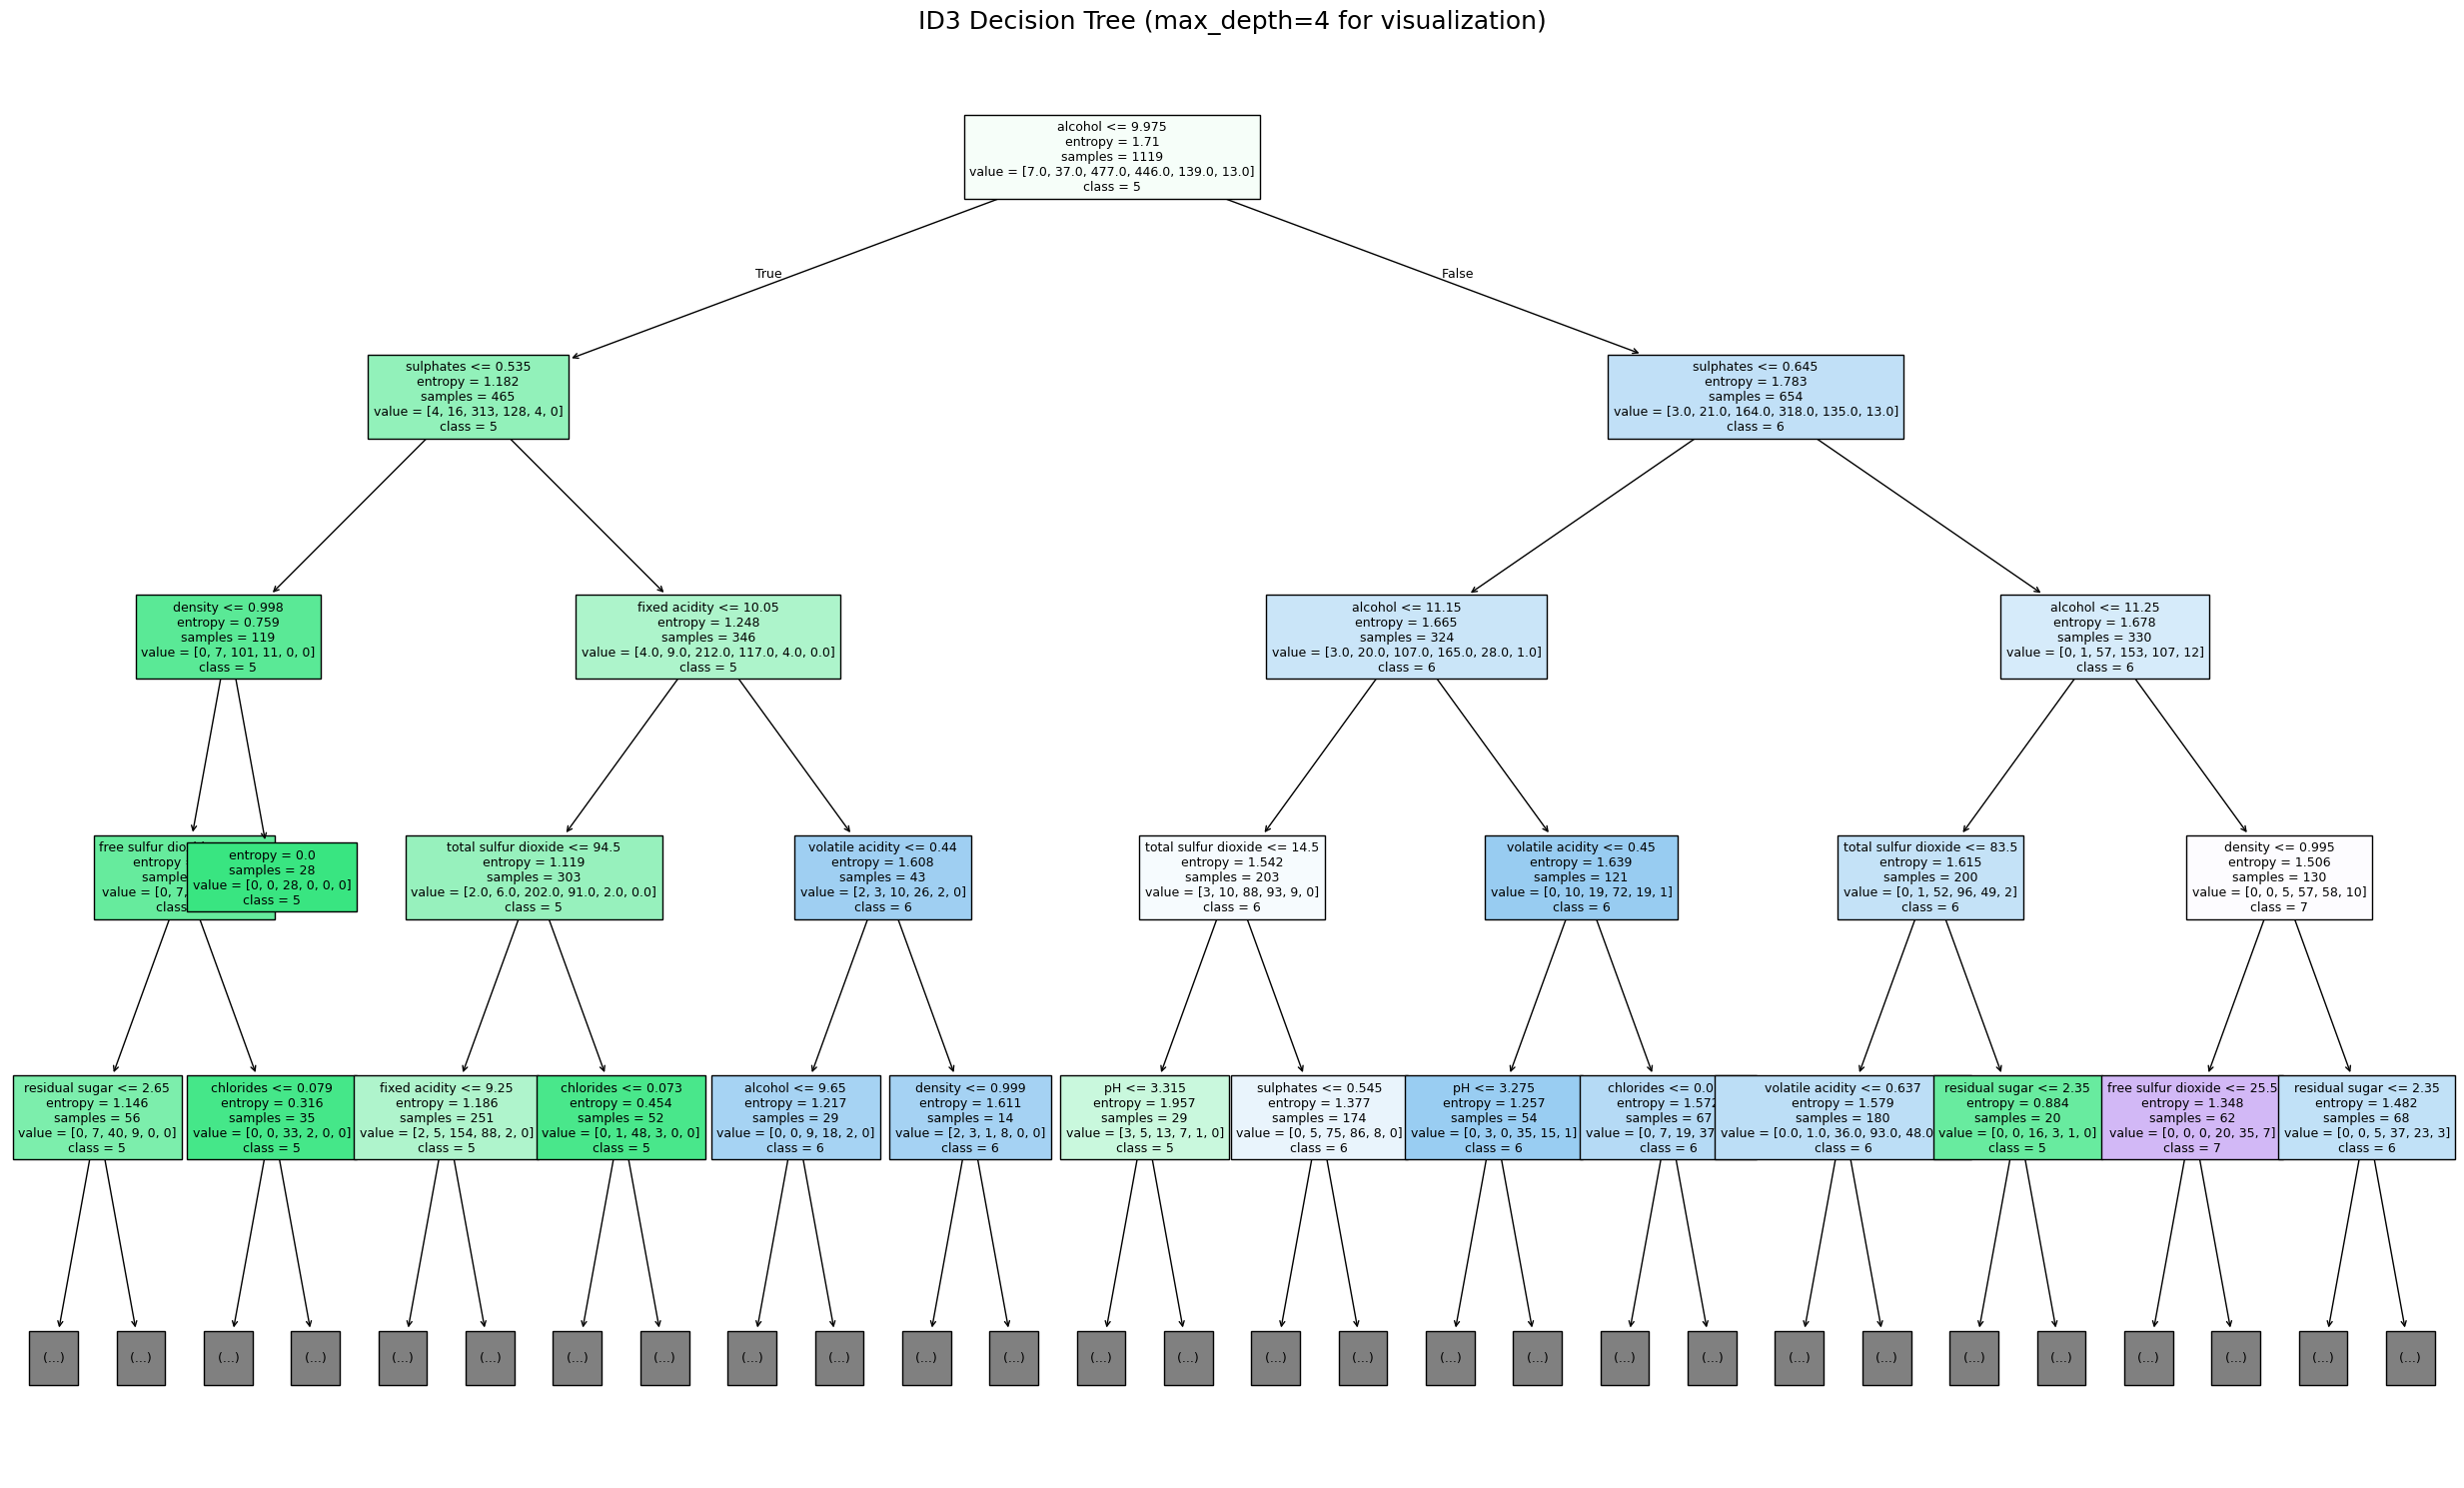

Đã lưu cây ID3 vào file 'wine_id3_decision_tree.png'


In [16]:
# Biểu diễn cây ID3 (giới hạn độ sâu để dễ quan sát)
plt.figure(figsize=(25, 15))
tree.plot_tree(id3_model, 
               feature_names=X_train.columns, 
               class_names=[str(c) for c in sorted(y_train.unique())],
               filled=True, 
               max_depth=4,  # Giới hạn độ sâu hiển thị
               fontsize=9)
plt.title('ID3 Decision Tree (max_depth=4 for visualization)', fontsize=18)
plt.tight_layout()
plt.savefig('wine_id3_decision_tree.png', dpi=100, bbox_inches='tight')
plt.show()
print("Đã lưu cây ID3 vào file 'wine_id3_decision_tree.png'")

Top 10 thuộc tính quan trọng nhất (ID3):


,feature,importance
10,alcohol,0.180738
1,volatile acidity,0.128188
9,sulphates,0.114852
6,total sulfur dioxide,0.100572
4,chlorides,0.087231
7,density,0.077950
3,residual sugar,0.073419
8,pH,0.066278
5,free sulfur dioxide,0.062736
0,fixed acidity,0.056588


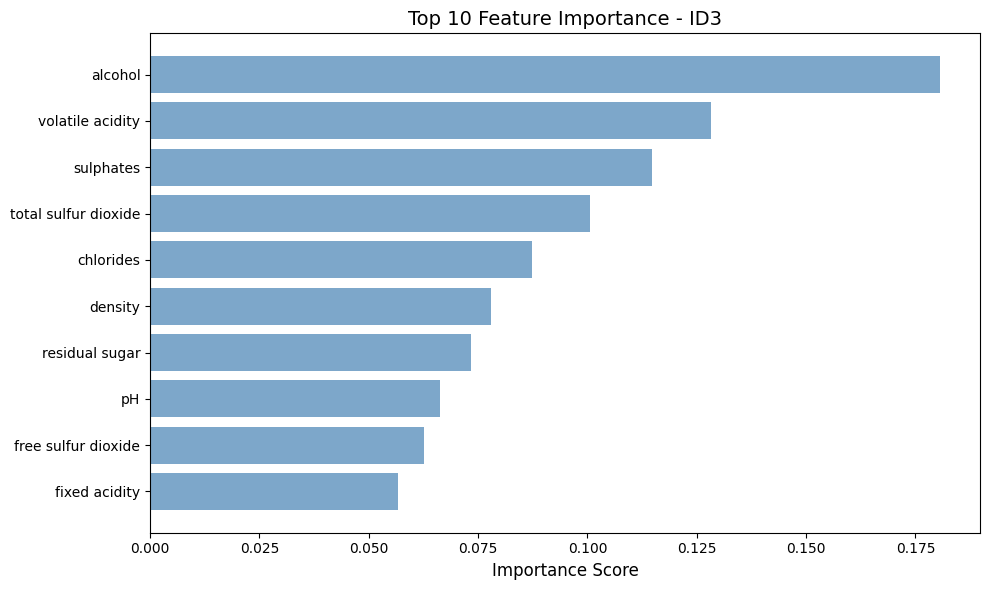

In [17]:
# Feature importance của ID3
feature_importance_id3 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': id3_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 thuộc tính quan trọng nhất (ID3):")
display(feature_importance_id3.head(10))

# Vẽ biểu đồ feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_id3['feature'].head(10)[::-1], 
         feature_importance_id3['importance'].head(10)[::-1],
         color='steelblue', alpha=0.7)
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 10 Feature Importance - ID3', fontsize=14)
plt.tight_layout()
plt.show()

## Câu 8: Xây dựng cây quyết định CART (criterion='gini')

In [18]:
# Xây dựng mô hình cây CART
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_model.fit(X_train, y_train)

print("Mô hình cây CART đã được huấn luyện")
print(f"Độ sâu của cây: {cart_model.get_depth()}")
print(f"Số lượng lá: {cart_model.get_n_leaves()}")

Mô hình cây CART đã được huấn luyện
Độ sâu của cây: 18
Số lượng lá: 285


In [19]:
# Dự đoán trên tập kiểm thử
y_pred_cart = cart_model.predict(X_test)

# Tính toán độ chính xác
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print(f"Độ chính xác của mô hình CART: {accuracy_cart:.4f}")

# In classification report
print("\nClassification Report (CART):")
print(classification_report(y_test, y_pred_cart))

Độ chính xác của mô hình CART: 0.5750

Classification Report (CART):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.17      0.19      0.18        16
           5       0.65      0.64      0.65       204
           6       0.58      0.57      0.58       192
           7       0.45      0.52      0.48        60
           8       0.50      0.20      0.29         5

    accuracy                           0.57       480
   macro avg       0.39      0.35      0.36       480
weighted avg       0.58      0.57      0.57       480



Ma trận nhầm lẫn (CART):
[[  0   1   2   0   0   0]
 [  0   3  10   2   1   0]
 [  1   9 131  55   8   0]
 [  0   4  50 110  27   1]
 [  0   1   8  20  31   0]
 [  0   0   0   2   2   1]]


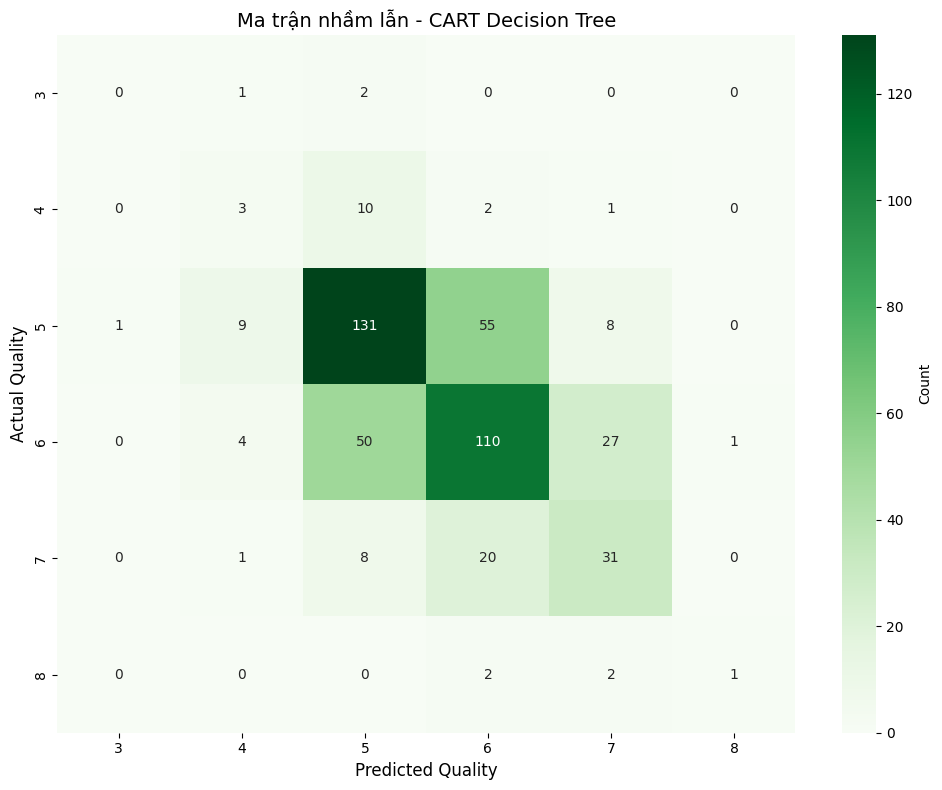

In [20]:
# Tính toán ma trận nhầm lẫn
cm_cart = confusion_matrix(y_test, y_pred_cart)
print("Ma trận nhầm lẫn (CART):")
print(cm_cart)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cart, annot=True, fmt='d', cmap='Greens', 
            xticklabels=quality_labels, 
            yticklabels=quality_labels,
            cbar_kws={'label': 'Count'})
plt.title('Ma trận nhầm lẫn - CART Decision Tree', fontsize=14)
plt.ylabel('Actual Quality', fontsize=12)
plt.xlabel('Predicted Quality', fontsize=12)
plt.tight_layout()
plt.show()

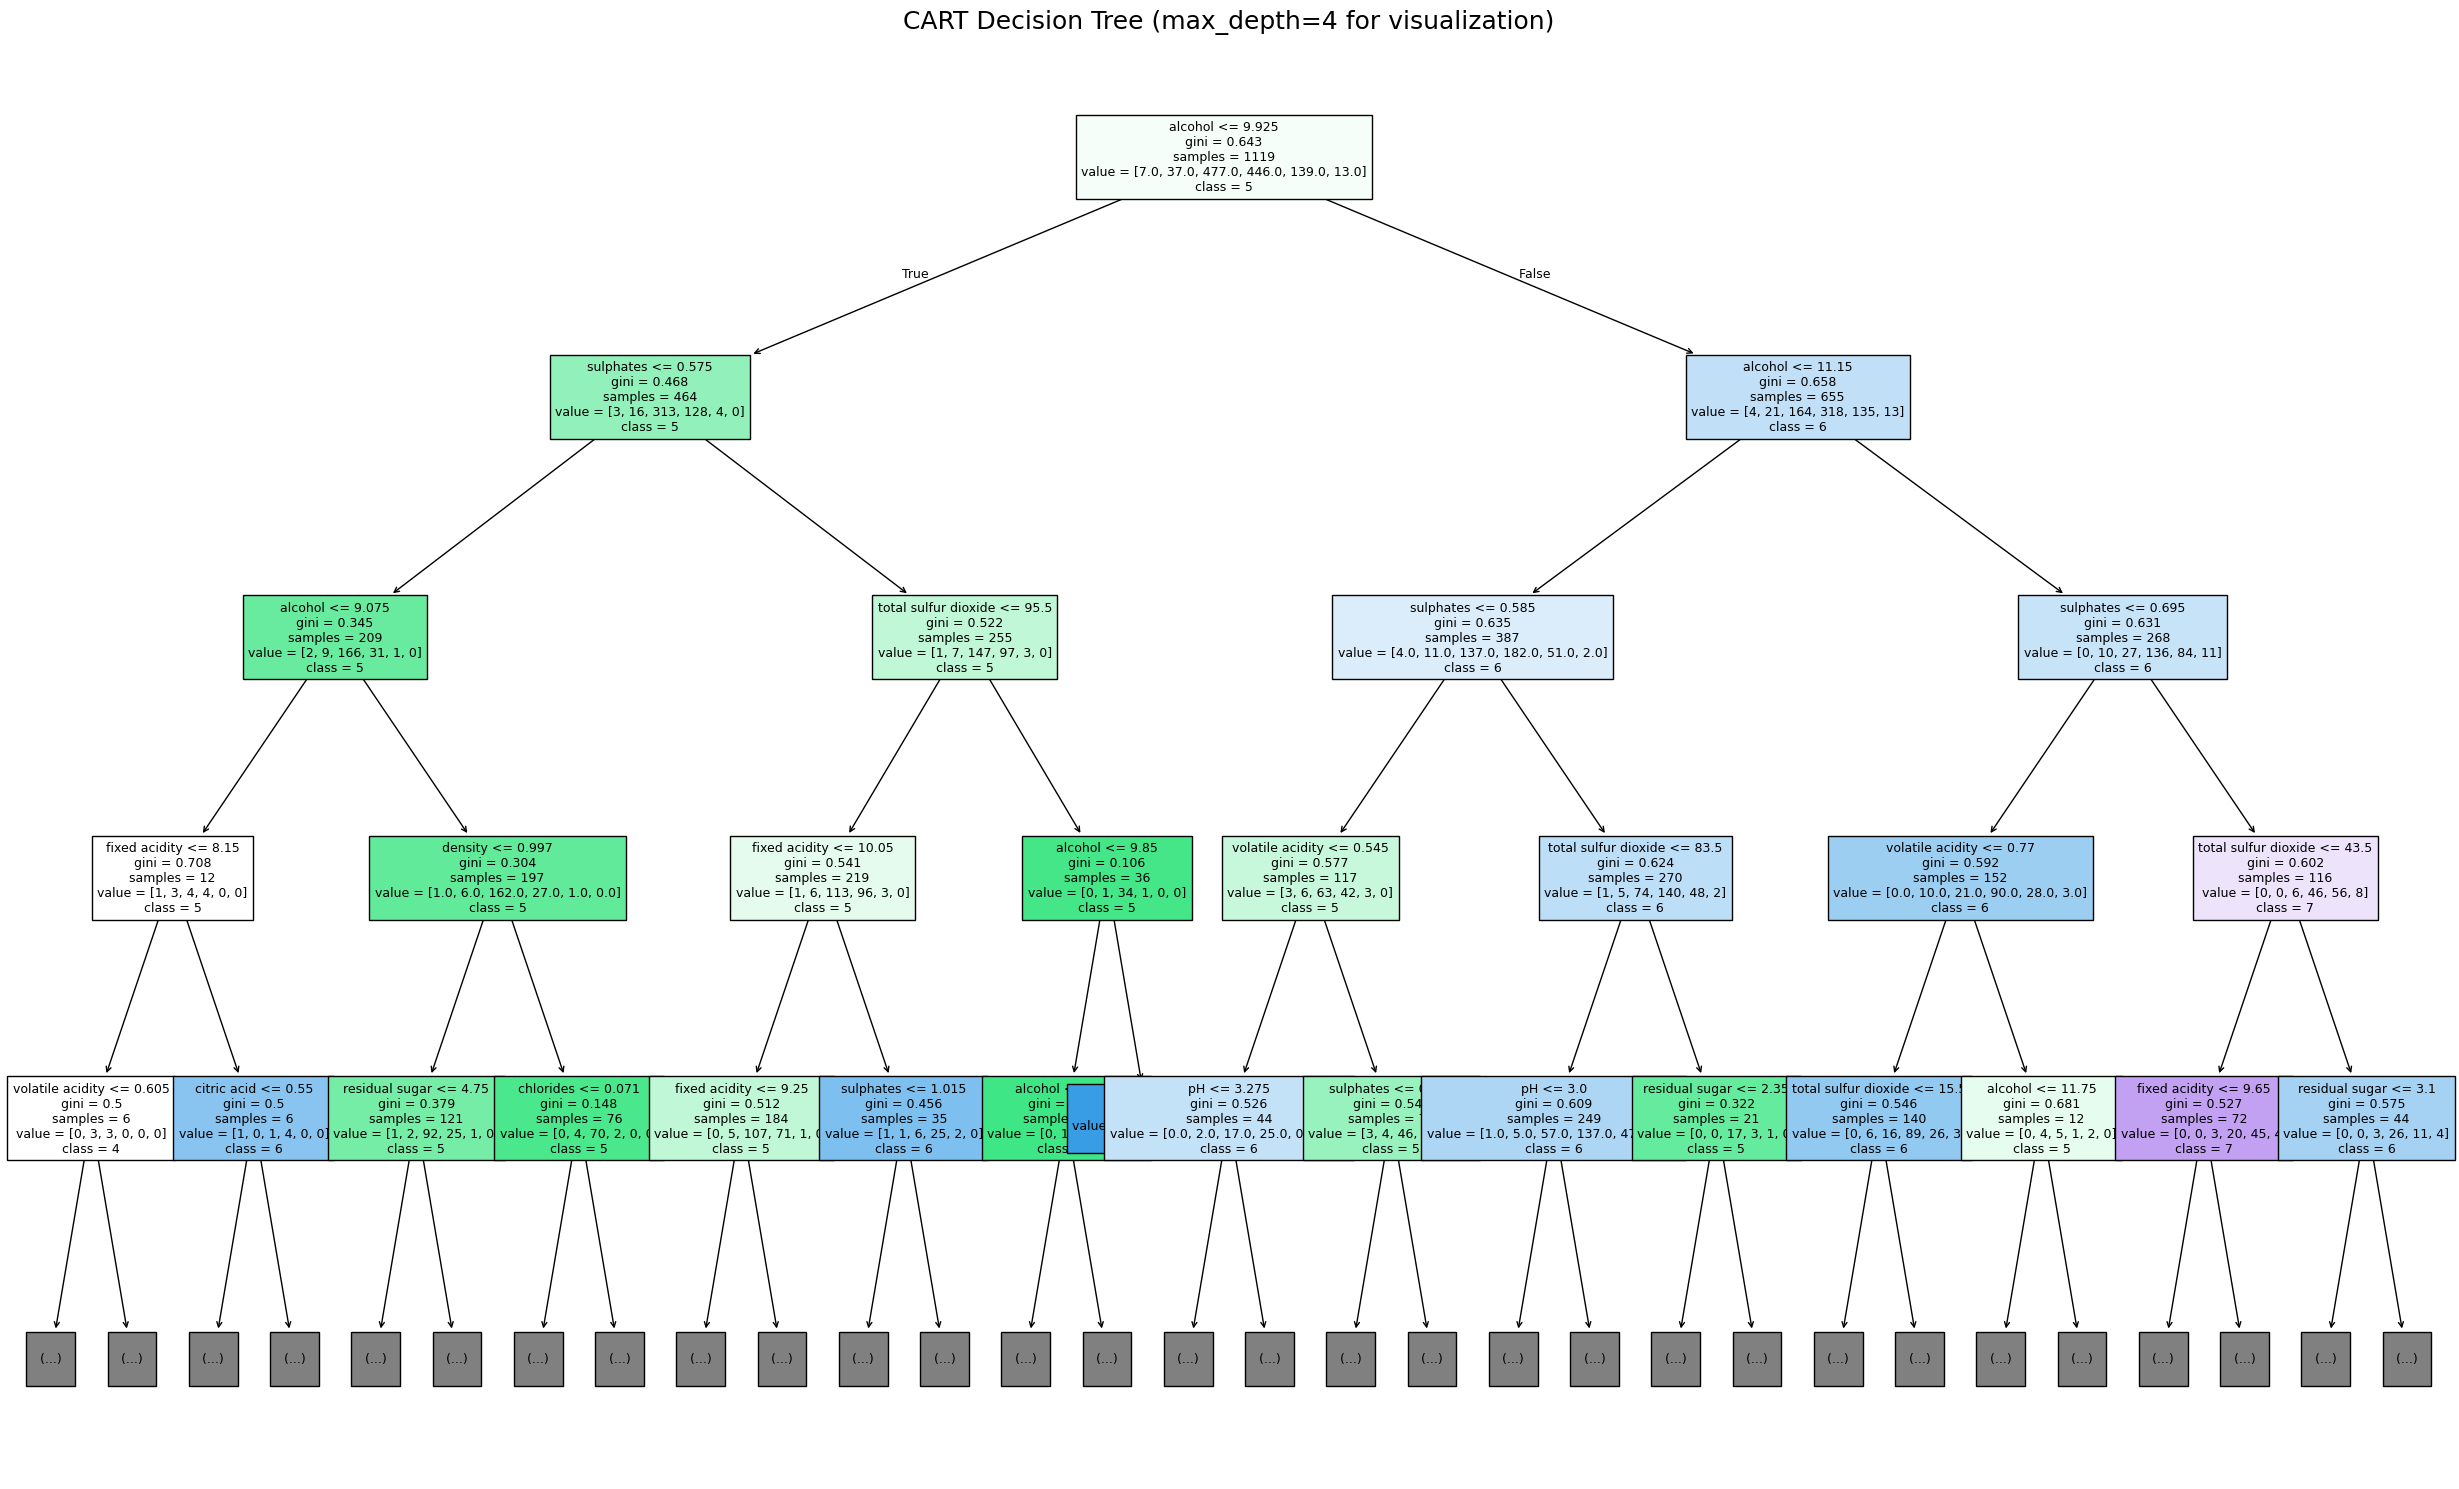

Đã lưu cây CART vào file 'wine_cart_decision_tree.png'


In [21]:
# Biểu diễn cây CART (giới hạn độ sâu để dễ quan sát)
plt.figure(figsize=(25, 15))
tree.plot_tree(cart_model, 
               feature_names=X_train.columns, 
               class_names=[str(c) for c in sorted(y_train.unique())],
               filled=True, 
               max_depth=4,  # Giới hạn độ sâu hiển thị
               fontsize=9)
plt.title('CART Decision Tree (max_depth=4 for visualization)', fontsize=18)
plt.tight_layout()
plt.savefig('wine_cart_decision_tree.png', dpi=100, bbox_inches='tight')
plt.show()
print("Đã lưu cây CART vào file 'wine_cart_decision_tree.png'")

Top 10 thuộc tính quan trọng nhất (CART):


,feature,importance
10,alcohol,0.194507
9,sulphates,0.126214
6,total sulfur dioxide,0.110020
1,volatile acidity,0.101069
8,pH,0.089807
4,chlorides,0.089031
7,density,0.078635
0,fixed acidity,0.073234
3,residual sugar,0.064841
2,citric acid,0.043475


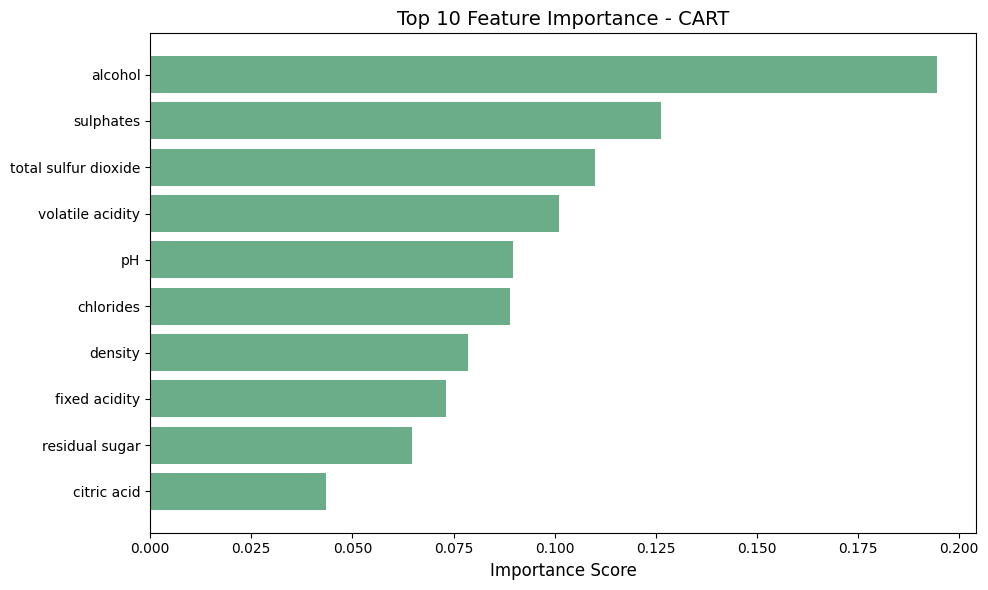

In [22]:
# Feature importance của CART
feature_importance_cart = pd.DataFrame({
    'feature': X_train.columns,
    'importance': cart_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 thuộc tính quan trọng nhất (CART):")
display(feature_importance_cart.head(10))

# Vẽ biểu đồ feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_cart['feature'].head(10)[::-1], 
         feature_importance_cart['importance'].head(10)[::-1],
         color='seagreen', alpha=0.7)
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 10 Feature Importance - CART', fontsize=14)
plt.tight_layout()
plt.show()

## Câu 9: Xây dựng mô hình Naïve Bayes

In [23]:
# Xây dựng mô hình Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

print("Mô hình Naïve Bayes đã được huấn luyện")

Mô hình Naïve Bayes đã được huấn luyện


In [24]:
# Dự đoán trên tập kiểm thử
y_pred_nb = nb_model.predict(X_test)

# Tính toán độ chính xác
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Độ chính xác của mô hình Naïve Bayes: {accuracy_nb:.4f}")

# In classification report
print("\nClassification Report (Naïve Bayes):")
print(classification_report(y_test, y_pred_nb))

Độ chính xác của mô hình Naïve Bayes: 0.5604

Classification Report (Naïve Bayes):
              precision    recall  f1-score   support

           3       0.14      0.33      0.20         3
           4       0.05      0.06      0.06        16
           5       0.66      0.64      0.65       204
           6       0.56      0.53      0.54       192
           7       0.52      0.57      0.54        60
           8       0.00      0.00      0.00         5

    accuracy                           0.56       480
   macro avg       0.32      0.36      0.33       480
weighted avg       0.57      0.56      0.57       480



Ma trận nhầm lẫn (Naïve Bayes):
[[  1   1   1   0   0   0]
 [  2   1  10   3   0   0]
 [  4   8 131  56   4   1]
 [  0   9  55 102  23   3]
 [  0   1   0  21  34   4]
 [  0   0   0   1   4   0]]


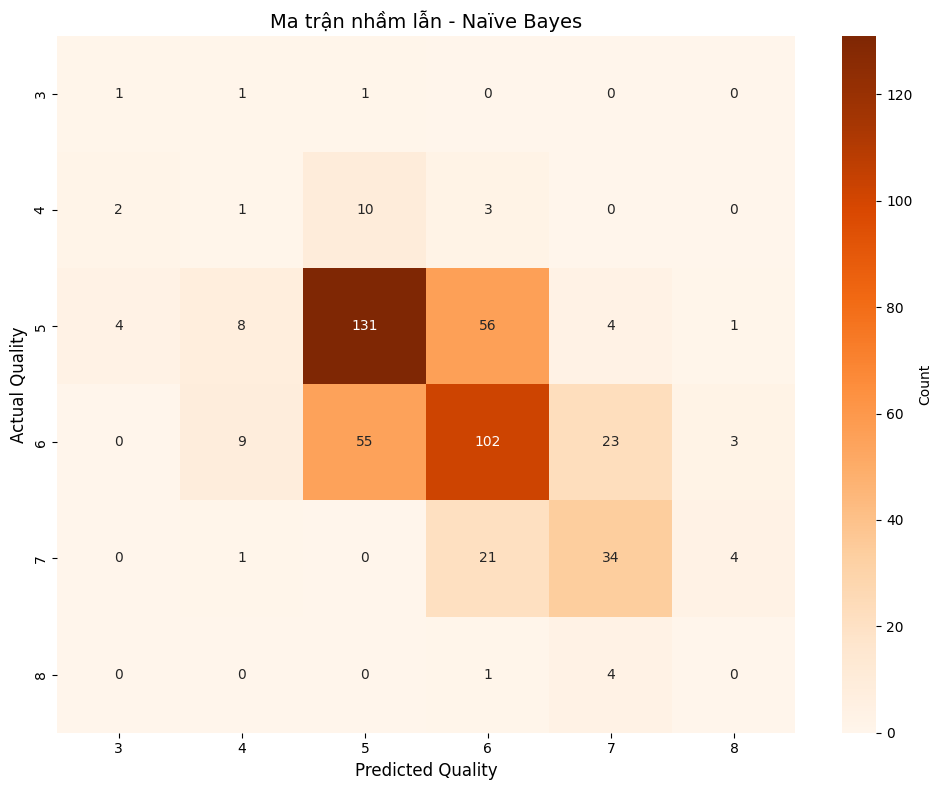

In [25]:
# Tính toán ma trận nhầm lẫn
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Ma trận nhầm lẫn (Naïve Bayes):")
print(cm_nb)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=quality_labels, 
            yticklabels=quality_labels,
            cbar_kws={'label': 'Count'})
plt.title('Ma trận nhầm lẫn - Naïve Bayes', fontsize=14)
plt.ylabel('Actual Quality', fontsize=12)
plt.xlabel('Predicted Quality', fontsize=12)
plt.tight_layout()
plt.show()

## Câu 10: So sánh kết quả các mô hình

In [26]:
# Tổng hợp kết quả
results = pd.DataFrame({
    'Model': ['ID3 (Entropy)', 'CART (Gini)', 'Naïve Bayes'],
    'Accuracy': [accuracy_id3, accuracy_cart, accuracy_nb],
    'Tree Depth': [id3_model.get_depth(), cart_model.get_depth(), 'N/A'],
    'Number of Leaves': [id3_model.get_n_leaves(), cart_model.get_n_leaves(), 'N/A']
})

print("="*80)
print("SO SÁNH KẾT QUẢ CÁC MÔ HÌNH")
print("="*80)
display(results)
print("="*80)

SO SÁNH KẾT QUẢ CÁC MÔ HÌNH


,Model,Accuracy,Tree Depth,Number of Leaves
0,ID3 (Entropy),0.575000,17,285
1,CART (Gini),0.575000,18,285
2,Naïve Bayes,0.560417,N/A,N/A


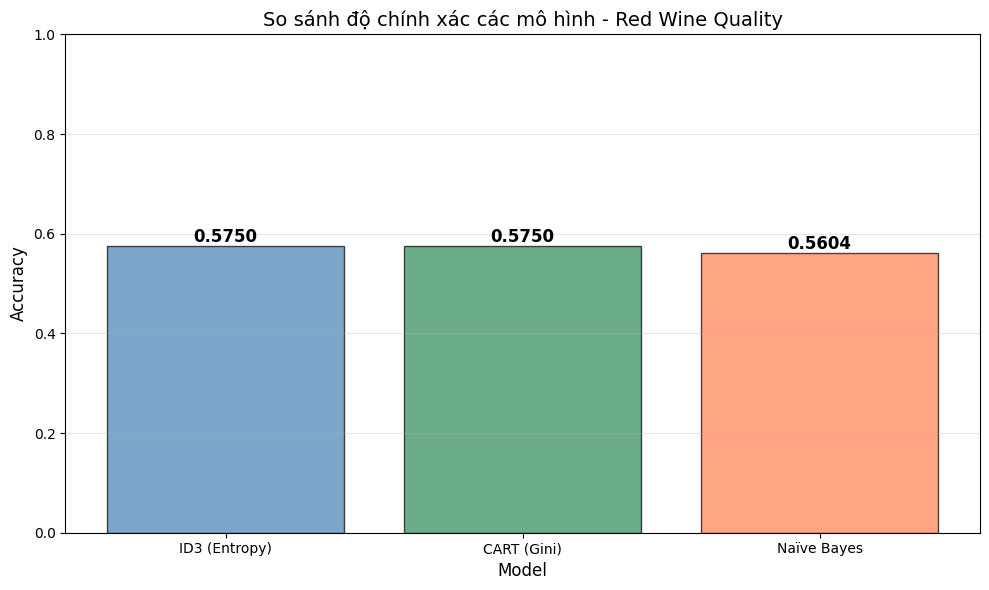

In [27]:
# Vẽ biểu đồ so sánh accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar(results['Model'], results['Accuracy'], 
               color=['steelblue', 'seagreen', 'coral'], alpha=0.7, edgecolor='black')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.title('So sánh độ chính xác các mô hình - Red Wine Quality', fontsize=14)
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# Thêm giá trị trên các cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

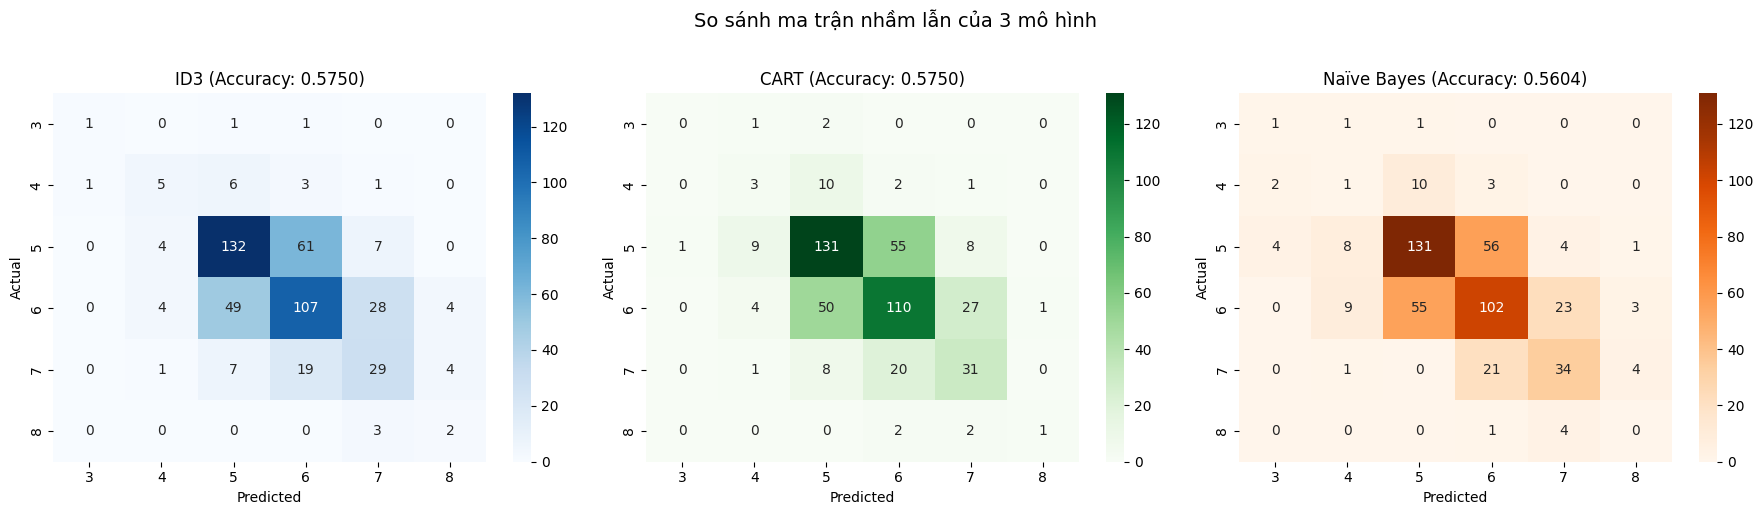

In [28]:
# So sánh ma trận nhầm lẫn của 3 mô hình
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ID3
sns.heatmap(cm_id3, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=quality_labels, yticklabels=quality_labels)
axes[0].set_title(f'ID3 (Accuracy: {accuracy_id3:.4f})', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=10)
axes[0].set_xlabel('Predicted', fontsize=10)

# CART
sns.heatmap(cm_cart, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=quality_labels, yticklabels=quality_labels)
axes[1].set_title(f'CART (Accuracy: {accuracy_cart:.4f})', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=10)
axes[1].set_xlabel('Predicted', fontsize=10)

# Naïve Bayes
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', ax=axes[2],
            xticklabels=quality_labels, yticklabels=quality_labels)
axes[2].set_title(f'Naïve Bayes (Accuracy: {accuracy_nb:.4f})', fontsize=12)
axes[2].set_ylabel('Actual', fontsize=10)
axes[2].set_xlabel('Predicted', fontsize=10)

plt.suptitle('So sánh ma trận nhầm lẫn của 3 mô hình', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()